
Computed Bounds:
-------------------------------------------------
Pair      Distance (Å)   Lower Bound (Å)     Upper Bound (Å)
-------------------------------------------------
S-O       1.7            1.5                 1.9
O-O       1.48           1.28                1.68
S-H       1.34           1.14                1.54
O-H       0.96           0.76                1.16


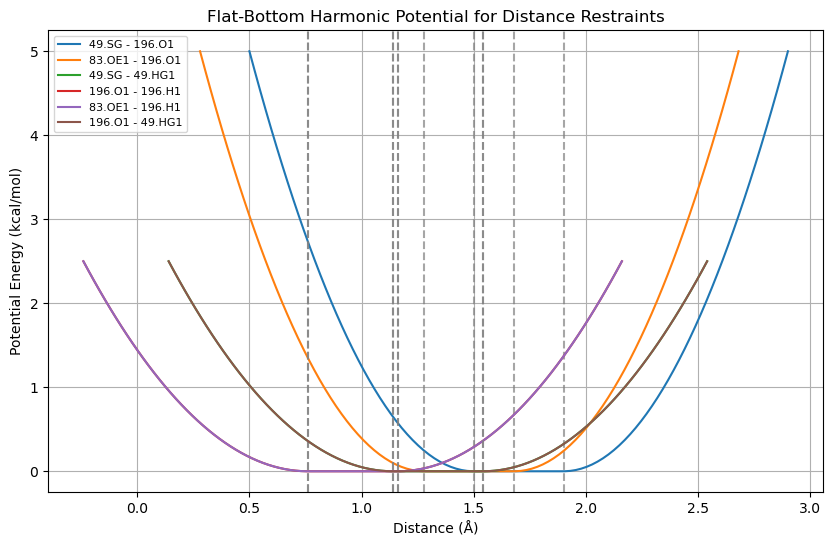

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute flat-bottom harmonic potential
def flat_bottom_harmonic_potential(d, d_min, d_max, k):
    if d_min <= d <= d_max:
        return 0  # No energy within the flat-bottom range
    d_ref = d_min if d < d_min else d_max  # Closest boundary
    return 0.5 * k * (d - d_ref) ** 2  # Harmonic potential outside range

# Given distances
distances = {
    "S-O": 1.7,
    "O-O": 1.48,
    "S-H": 1.34,
    "O-H": 0.96
}

# Define tolerance as a percentage of the actual distance (10%) or minimum 0.2 Å
tolerance_factor = 0.1  # 10%
min_tolerance = 0.2

# Compute lower and upper bounds for restraints
bounds = {}
print("\nComputed Bounds:")
print("-------------------------------------------------")
print(f"{'Pair':<10}{'Distance (Å)':<15}{'Lower Bound (Å)':<20}{'Upper Bound (Å)'}")
print("-------------------------------------------------")

for pair, d in distances.items():
    delta = max(d * tolerance_factor, min_tolerance)  # Ensure minimum tolerance
    d_min = round(d - delta, 2)
    d_max = round(d + delta, 2)
    bounds[pair] = (d_min, d_max)
    
    # Print computed bounds
    print(f"{pair:<10}{d:<15}{d_min:<20}{d_max}")

# Define restraints with calculated bounds
restraints = [
    ("49.SG - 196.O1", *bounds["S-O"], 10.0),
    ("83.OE1 - 196.O1", *bounds["O-O"], 10.0),
    ("49.SG - 49.HG1", *bounds["S-H"], 5.0),
    ("196.O1 - 196.H1", *bounds["O-H"], 5.0),
    ("83.OE1 - 196.H1", *bounds["O-H"], 5.0),
    ("196.O1 - 49.HG1", *bounds["S-H"], 5.0),
]

# Plot potential energy function for each restraint
plt.figure(figsize=(10, 6))

for i, (name, d_min, d_max, k) in enumerate(restraints):
    d_values = np.linspace(d_min - 1, d_max + 1, 100)  # Extended range
    energy_values = [flat_bottom_harmonic_potential(d, d_min, d_max, k) for d in d_values]

    plt.plot(d_values, energy_values, label=f"{name}")
    plt.axvline(d_min, linestyle='--', color='gray', alpha=0.7)
    plt.axvline(d_max, linestyle='--', color='gray', alpha=0.7)

plt.xlabel("Distance (Å)")
plt.ylabel("Potential Energy (kcal/mol)")
plt.legend(fontsize=8)
plt.title("Flat-Bottom Harmonic Potential for Distance Restraints")
plt.grid()
plt.show()



Computed Bounds for Sulfur System:
------------------------------------------------------------
Pair      Distance (Å)   Lower Bound (Å)     Upper Bound (Å)
------------------------------------------------------------
S-O       1.7            1.5                 1.9
O-O       1.48           1.28                1.68
S-H       1.34           1.14                1.54
O-H       0.96           0.76                1.16

Computed Bounds for Selenium System:
------------------------------------------------------------
Pair      Distance (Å)   Lower Bound (Å)     Upper Bound (Å)
------------------------------------------------------------
Se-O      1.5            1.3                 1.7
O-O       1.48           1.28                1.68
Se-H      1.47           1.27                1.67
O-H       0.96           0.76                1.16


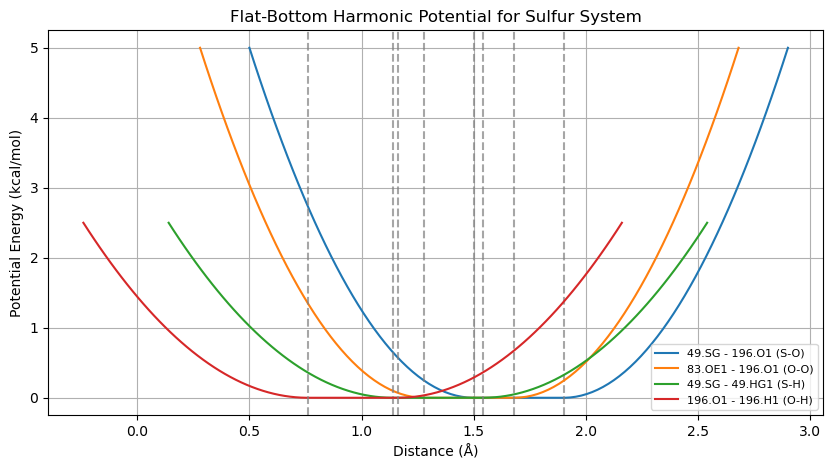

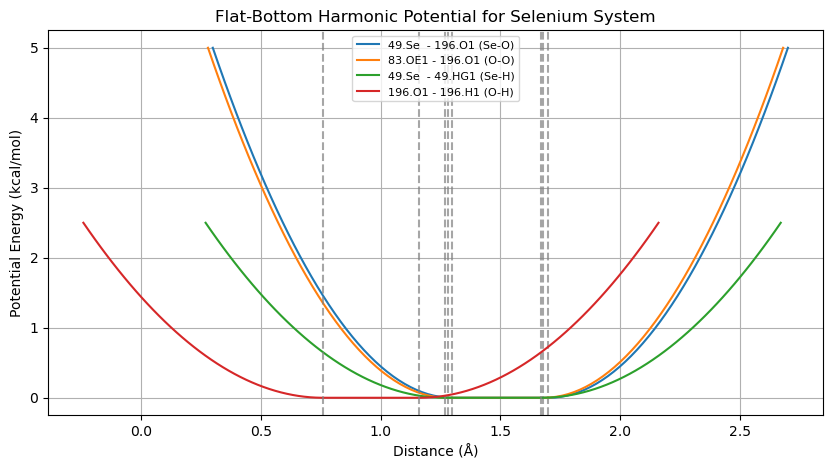

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute flat-bottom harmonic potential
def flat_bottom_harmonic_potential(d, d_min, d_max, k):
    if d_min <= d <= d_max:
        return 0  # No energy within the flat-bottom range
    d_ref = d_min if d < d_min else d_max  # Closest boundary
    return 0.5 * k * (d - d_ref) ** 2  # Harmonic potential outside range

# Given distances for Sulfur (S) and Selenium (Se) systems
sulfur_distances = {
    "S-O": 1.7,
    "O-O": 1.48,
    "S-H": 1.34,
    "O-H": 0.96
}

selenium_distances = {
    "Se-O": 1.5,
    "O-O": 1.48,  # Same for both systems
    "Se-H": 1.47,
    "O-H": 0.96  # Same for both systems
}

# Define tolerance as a percentage of the actual distance (10%) or minimum 0.2 Å
tolerance_factor = 0.1  # 10%
min_tolerance = 0.2

# Function to compute lower and upper bounds
def compute_bounds(distances):
    bounds = {}
    for pair, d in distances.items():
        delta = max(d * tolerance_factor, min_tolerance)  # Ensure minimum tolerance
        d_min = round(d - delta, 2)
        d_max = round(d + delta, 2)
        bounds[pair] = (d_min, d_max)
    return bounds

# Compute bounds for both systems
sulfur_bounds = compute_bounds(sulfur_distances)
selenium_bounds = compute_bounds(selenium_distances)

# Print computed bounds for Sulfur system
print("\nComputed Bounds for Sulfur System:")
print("------------------------------------------------------------")
print(f"{'Pair':<10}{'Distance (Å)':<15}{'Lower Bound (Å)':<20}{'Upper Bound (Å)'}")
print("------------------------------------------------------------")
for pair, d in sulfur_distances.items():
    d_min, d_max = sulfur_bounds[pair]
    print(f"{pair:<10}{d:<15}{d_min:<20}{d_max}")

# Print computed bounds for Selenium system
print("\nComputed Bounds for Selenium System:")
print("------------------------------------------------------------")
print(f"{'Pair':<10}{'Distance (Å)':<15}{'Lower Bound (Å)':<20}{'Upper Bound (Å)'}")
print("------------------------------------------------------------")
for pair, d in selenium_distances.items():
    d_min, d_max = selenium_bounds[pair]
    print(f"{pair:<10}{d:<15}{d_min:<20}{d_max}")

# Define restraints separately for both systems
sulfur_restraints = [
    ("49.SG - 196.O1 (S-O)", *sulfur_bounds["S-O"], 10.0),
    ("83.OE1 - 196.O1 (O-O)", *sulfur_bounds["O-O"], 10.0),
    ("49.SG - 49.HG1 (S-H)", *sulfur_bounds["S-H"], 5.0),
    ("196.O1 - 196.H1 (O-H)", *sulfur_bounds["O-H"], 5.0),
]

selenium_restraints = [
    ("49.Se  - 196.O1 (Se-O)", *selenium_bounds["Se-O"], 10.0),
    ("83.OE1 - 196.O1 (O-O)", *selenium_bounds["O-O"], 10.0),  # Same O-O
    ("49.Se  - 49.HG1 (Se-H)", *selenium_bounds["Se-H"], 5.0),
    ("196.O1 - 196.H1 (O-H)", *selenium_bounds["O-H"], 5.0),
]

# Plot for Sulfur system
plt.figure(figsize=(10, 5))
for i, (name, d_min, d_max, k) in enumerate(sulfur_restraints):
    d_values = np.linspace(d_min - 1, d_max + 1, 100)  # Extended range
    energy_values = [flat_bottom_harmonic_potential(d, d_min, d_max, k) for d in d_values]

    plt.plot(d_values, energy_values, label=f"{name}")
    plt.axvline(d_min, linestyle='--', color='gray', alpha=0.7)
    plt.axvline(d_max, linestyle='--', color='gray', alpha=0.7)

plt.xlabel("Distance (Å)")
plt.ylabel("Potential Energy (kcal/mol)")
plt.legend(fontsize=8)
plt.title("Flat-Bottom Harmonic Potential for Sulfur System")
plt.grid()
plt.show()

# Plot for Selenium system
plt.figure(figsize=(10, 5))
for i, (name, d_min, d_max, k) in enumerate(selenium_restraints):
    d_values = np.linspace(d_min - 1, d_max + 1, 100)  # Extended range
    energy_values = [flat_bottom_harmonic_potential(d, d_min, d_max, k) for d in d_values]

    plt.plot(d_values, energy_values, label=f"{name}")
    plt.axvline(d_min, linestyle='--', color='gray', alpha=0.7)
    plt.axvline(d_max, linestyle='--', color='gray', alpha=0.7)

plt.xlabel("Distance (Å)")
plt.ylabel("Potential Energy (kcal/mol)")
plt.legend(fontsize=8)
plt.title("Flat-Bottom Harmonic Potential for Selenium System")
plt.grid()
plt.show()
